In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("/kaggle/input/pict-lab-dataset/goog.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


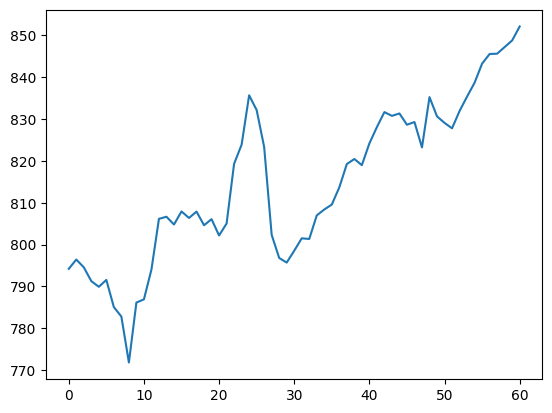

In [17]:
plt.plot(df['Close'])

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

In [19]:
training_size = int(len(df_normalized)*0.8)
train_data, test_data = df_normalized[:training_size, :], df_normalized[training_size:, :]

len(train_data), len(test_data)

(48, 13)

In [20]:
def create_dataset(data, step=4):
  x = []
  y = []
  for i in range(len(data) - step):
    x.append(data[i:i+step, 0])
    y.append(data[i+step, 0])

  return np.array(x), np.array(y)

# basically if dataset is [123 124 125 124 123 125 127]
# Independent 4 days  -> next day dependent
# s1  s1  s2  s3  y
# 123 124 125 124 123
# 124 125 124 123 125
# 125 124 123 125 127

x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2411
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2196 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1838 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1541 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1247
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1003 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0763 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

In [22]:
metrics = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - loss: 0.0289


In [23]:
y_pred=scaler.inverse_transform(model.predict(x_test))
y_test=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  13.300604848090277
MSE:  186.36924867868265
RMSE:  13.651712298414534


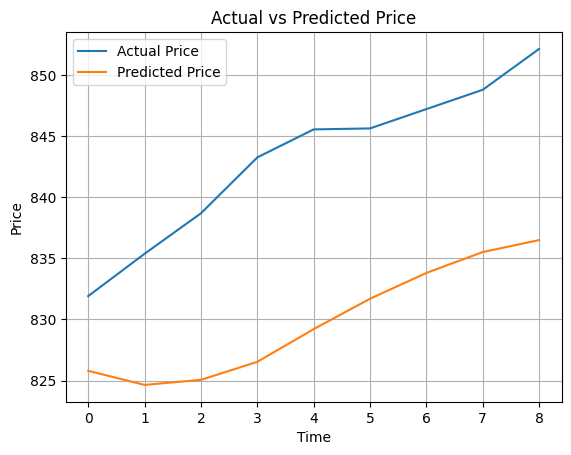

In [25]:
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()